## Runme

```
./cmp-multik-multisig.py  SRR606249.sig ?.fa.sig ??.fa.sig > multik.csv
```

In [1]:
import sys
sys.path.insert(0, '../')
import nicenames

dup Desulfovibrio vulgaris DP4
dup Shewanella baltica OS223


In [2]:
import csv
x = []
r = csv.reader(open('multik.csv'))

#a = next(r)
KSIZES = [21,31,51]
for against, query_name, query_file, *kvals in r:
    x.append((query_name, query_file, *[ float(i) for i in kvals ]))

print(len(x))
assert len(x) == 64

64


In [3]:
%matplotlib inline
import pylab

51


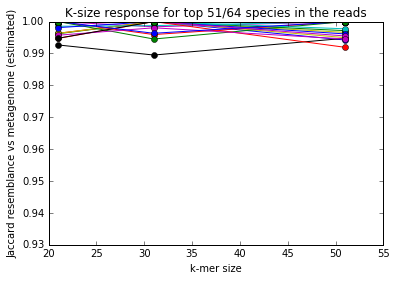

In [4]:
n = 0
removed = []
for name, filename, *kvals in x:
    if kvals[-1] <= 0.99:
        removed.append((nicenames.nicenames[filename[3:-4]], kvals[-1]))
        continue
    pylab.plot(KSIZES, kvals, '-o')
    n += 1
    
pylab.axis(ymin=0.93)
pylab.title('K-size response for top 51/64 species in the reads')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
#pylab.legend(loc='upper right')
print(n)
pylab.savefig('top.pdf')

In [10]:
removed.sort(key=lambda x:-x[1])

for name, frac in removed:
    print('{:.1f} & {{ \small \em {} }} \\\\ \\hline'.format(frac * 100, name))

98.7 & { \small \em Leptothrix cholodnii } \\ \hline
98.7 & { \small \em Haloferax volcanii DS2 } \\ \hline
98.6 & { \small \em Salinispora tropica CNB-440 } \\ \hline
97.4 & { \small \em Deinococcus radiodurans } \\ \hline
97.2 & { \small \em Zymomonas mobilis } \\ \hline
97.1 & { \small \em Ruegeria pomeroyi } \\ \hline
96.8 & { \small \em Shewanella baltica OS223 } \\ \hline
95.5 & { \small \em B. bronchiseptica D989 } \\ \hline
94.5 & { \small \em Burkholderia xenovorans } \\ \hline
72.0 & { \small \em Desulfovibrio vulgaris DP4 } \\ \hline
65.0 & { \small \em Thermus thermophilus HB27 } \\ \hline
53.4 & { \small \em Enterococcus faecalis } \\ \hline
4.7 & { \small \em Fusobacterium nucleatum ATCC 25586 } \\ \hline


NC_003911.12 Ruegeria pomeroyi DSS-3, complete genome ../genomes/44.fa.sig
NZ_CP015081.1 Deinococcus radiodurans R1 chromosome 1, complete sequence ../genomes/16.fa.sig
NC_013968.1 Haloferax volcanii DS2 plasmid pHV1, complete sequence ../genomes/23.fa.sig
NZ_KQ961402.1 Zymomonas mobilis strain ATCC 31823 Scaffold1, whole genome shotgun sequence ../genomes/58.fa.sig
NZ_KE136524.1 Enterococcus faecalis V583 acyDH-supercont2.1, whole genome shotgun sequence ../genomes/19.fa.sig
CP001013.1 Leptothrix cholodnii SP-6, complete genome ../genomes/27.fa.sig
AE017221.1 Thermus thermophilus HB27, complete genome ../genomes/55.fa.sig
NC_008751.1 Desulfovibrio vulgaris DP4, complete genome ../genomes/17.fa.sig
AE009951.2 Fusobacterium nucleatum subsp. nucleatum ATCC 25586, complete genome ../genomes/20.fa.sig
NZ_JGWU01000001.1 Bordetella bronchiseptica D989 ctg7180000008197, whole genome shotgun sequence ../genomes/6.fa.sig
CP000667.1 Salinispora tropica CNB-440, complete genome ../genomes/46.fa.s

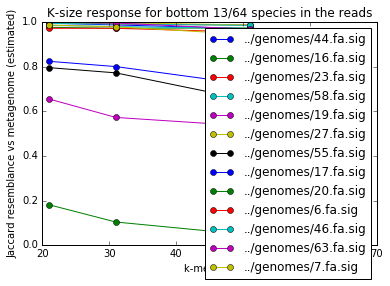

In [6]:
n = 0
for name, filename, *kvals in x:
    if kvals[-1] > 0.99:
        continue
    pylab.plot(KSIZES, kvals, '-o', label=filename)
    n += 1
    print(name, filename)
    
print(n)
    
pylab.axis(ymin=0.0, xmax=70)
pylab.legend(loc='upper right')
pylab.title('K-size response for bottom 13/64 species in the reads')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
pylab.savefig('bottom.pdf')

NC_003911.12 Ruegeria pomeroyi DSS-3, complete genome
NZ_CP015081.1 Deinococcus radiodurans R1 chromosome 1, complete sequence
NC_013968.1 Haloferax volcanii DS2 plasmid pHV1, complete sequence
NZ_KQ961402.1 Zymomonas mobilis strain ATCC 31823 Scaffold1, whole genome shotgun sequence
NZ_KE136524.1 Enterococcus faecalis V583 acyDH-supercont2.1, whole genome shotgun sequence
CP001013.1 Leptothrix cholodnii SP-6, complete genome
AE017221.1 Thermus thermophilus HB27, complete genome
NC_008751.1 Desulfovibrio vulgaris DP4, complete genome
AE009951.2 Fusobacterium nucleatum subsp. nucleatum ATCC 25586, complete genome
NZ_JGWU01000001.1 Bordetella bronchiseptica D989 ctg7180000008197, whole genome shotgun sequence
CP000667.1 Salinispora tropica CNB-440, complete genome
NC_011663.1 Shewanella baltica OS223, complete genome
NC_007951.1 Burkholderia xenovorans LB400 chromosome 1, complete sequence
13


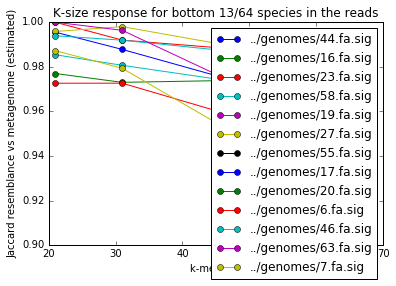

In [7]:
n = 0
filenames = []
for name, filename, *kvals in x:
    if kvals[-1] > 0.99:
        continue
    pylab.plot(KSIZES, kvals, '-o', label=filename)
    n += 1
    print(name)
    filenames.append(filename)
    
print(n)
    
pylab.axis(ymin=0.9, xmax=70)
pylab.legend(loc='upper right')
pylab.title('K-size response for bottom 13/64 species in the reads')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
pylab.savefig('bottom.pdf')

2


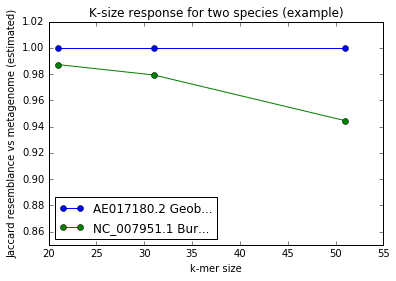

In [8]:
n = 0
for name, filename, *kvals in x:
    if not (name.startswith('AE017180.2 Geobacter') or name.startswith('NC_007951.1 Burkholderia')):
        continue
    pylab.plot(KSIZES, kvals, '-o', label=name[:15] + '...')
    #print(name)
    n += 1
    
pylab.axis(ymin=0.85, ymax=1.02)
pylab.title('K-size response for two species (example)')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
pylab.legend(loc='lower left')
print(n)
pylab.savefig('example.pdf')

In [9]:
# remove the genomes in these files from the official reference genome:
print("\n".join(filenames))

../genomes/44.fa.sig
../genomes/16.fa.sig
../genomes/23.fa.sig
../genomes/58.fa.sig
../genomes/19.fa.sig
../genomes/27.fa.sig
../genomes/55.fa.sig
../genomes/17.fa.sig
../genomes/20.fa.sig
../genomes/6.fa.sig
../genomes/46.fa.sig
../genomes/63.fa.sig
../genomes/7.fa.sig
